# Analiza Numeryczna (M)
## Pracownia 1 - Zadanie P2.10

Karolina Jeziorska

In [34]:
using Plots
using Polynomials
using Printf
pyplot()

Plots.PyPlotBackend()

Wielomian czwartego stopnia $f(x) = 8x^4 + 4x^3 + 8x^2 - 6x + 5$

In [35]:
coef = [5, -6, -8, 4, 8]
f = Poly(coef)

Poly(5 - 6*x - 8*x^2 + 4*x^3 + 8*x^4)

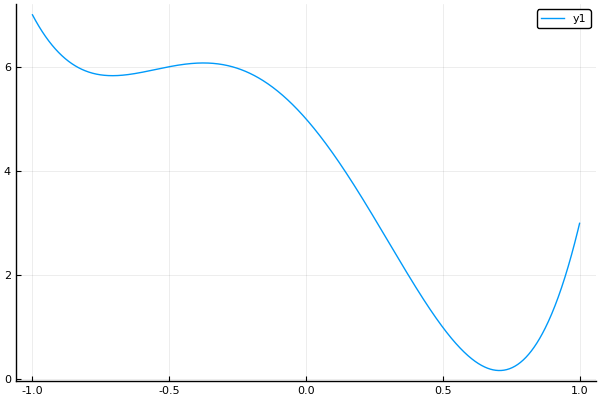

In [36]:
xs = LinRange(-1,1, 1000);
ys = map(f, xs)
plot(xs, ys)

Wybieramy 100 losowych punktów z zakresy $[-1,1]$ i wyznaczamy wartości wielomianu w tych punktach. Następnie zaburzamy te wartości dodając liczby z przedziału $[-\frac{1}{10},\frac{1}{10}]$

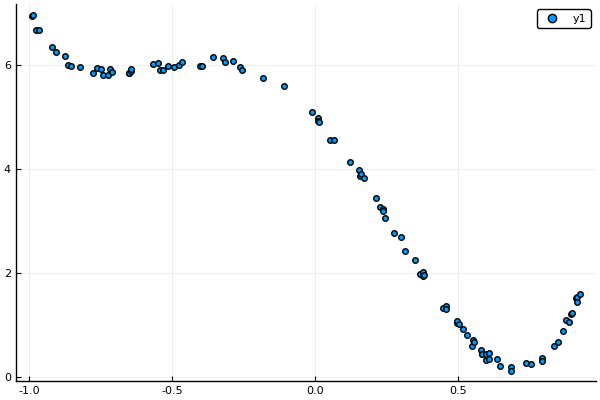

In [37]:
random_points = rand(100)
random_points = sort(map(x -> 2x - 1,random_points))
random_points_values = f.(random_points)
random_points_values_added = map(x -> x + (1/5)*rand() - 1/10,random_points_values) 
scatter(random_points,random_points_values_added)

Funkcja licząca iloczyn skalarny $\sum_{i = 1}^{100}p(x_i) f(x_i) g(x_i)$ ale gdzie $p(x) = 1$ i znamy wartości $f$ i $g$ w punktach $x_i$

In [38]:
function scalar(values_f,values_g)
    result = 0
    for i = 1:100
        result += (values_f[i] * values_g[i])
    end
    return result
end

scalar (generic function with 1 method)

Funkcja licząca bazę wielomianów - ale tak naprawdę wylicza wartości $c_k$ i $d_k$ oraz wzpółczynniki wielomianu optymalnego - nie potrzebujemy więc pamiętać wielomianów bazowych.

In [39]:
function cal_c(p1)
    xp1 = Float64[]
    for i = 1:100
        push!(xp1,random_points[i]*p1[i])
    end
    return scalar(xp1, p1)/scalar(p1, p1)
end

function cal_d(p1, p2)
    return scalar(p1, p1)/scalar(p2, p2)
end

function calculate_base(n)
    coef = Float64[]
    c = Float64[]
    d = Float64[]

    if n >= 0
        push!(c,0)
        push!(d,0)
        P0 = ones(100)
        push!(coef,scalar(random_points_values_added,P0)/scalar(P0,P0))
    end
    
    if n >= 1
        push!(c,cal_c(P0))
        push!(d,0)
        P1 = Float64[]
        for i = 1:100
            push!(P1,random_points[i] - c[2])
        end
        push!(coef, scalar(random_points_values_added,P1)/scalar(P1,P1))
    end
    if n>=2
        for i = 3:n+1
            push!(c,cal_c(P1))
            push!(d,cal_d(P1, P0))
            P2 = Float64[]
            for j = 1:100
                push!(P2,((random_points[j] - c[i]) * P1[j] - d[i] * P0[j]))
            end
            push!(coef, scalar(random_points_values_added,P2)/scalar(P2,P2))
            P0 = P1
            P1 = P2
        end
    end
    return coef, c, d      
end  

calculate_base (generic function with 1 method)

Algorytm Clenshaw'a liczący wartość wielomianu optymalnego w podanym punkcie
(tablice $c_k$ i $d_k$ mają n + 1 elementów dlatego wiedząc że $v_{n+3} = v_{n+2} = 0$ (mamy indeksowanie od 1 nie od 0) to ze wzoru na $v_k$ została już z góry ustalona wartość $v_{n+1}$ i $v_n$ dlatego peły wzór uzyty jest dopiero do liczenia $v_{n-1}$)

In [40]:
function Clenshaw(n,coef, β, γ,x)
    v2 = coef[n+1]
    if n >= 1
        v3 = v2
        v2 = coef[n] + (x - β[n+1])*v3
    end
    if n >= 2
        for i = n-1:-1:1
            v1 = coef[i] + (x - β[i + 1]) * v2 - γ[i + 2] * v3
            v3 = v2
            v2 = v1
        end
    end
    return v2
end

Clenshaw (generic function with 1 method)

### Wyliczanie i rysowanie wielomianów optymalnych

Liczymy współczynniki oraz wartości $\beta$ i $\gamma$ za pomocą funkcji calculate_base a później wyliczamy wartość wielomianu optymalnego za pomocą algorytmu Clenshaw'a w tych samych punktach za pomocą których rysowany był wielomian początkowy.

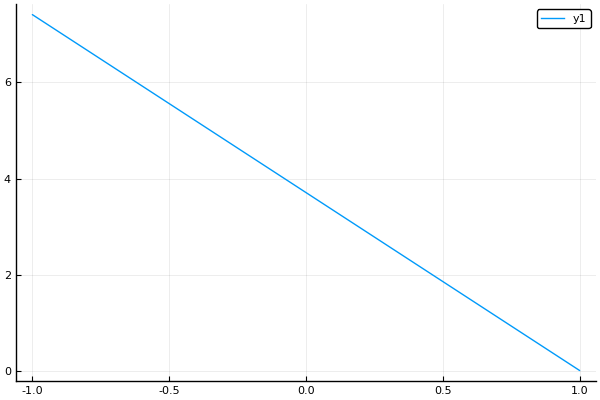

In [41]:
coef, β, γ = calculate_base(1)
ys1 = map(x -> Clenshaw(1, coef, β, γ,x), xs)
plot(xs, ys1)

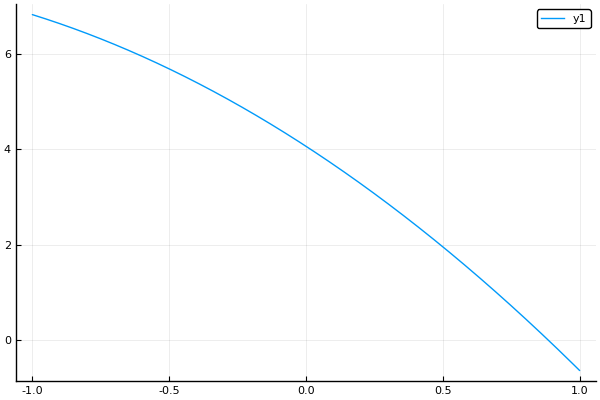

In [42]:
coef, β, γ = calculate_base(2)
ys2 = map(x -> Clenshaw(2, coef, β, γ,x), xs)
plot(xs, ys2)

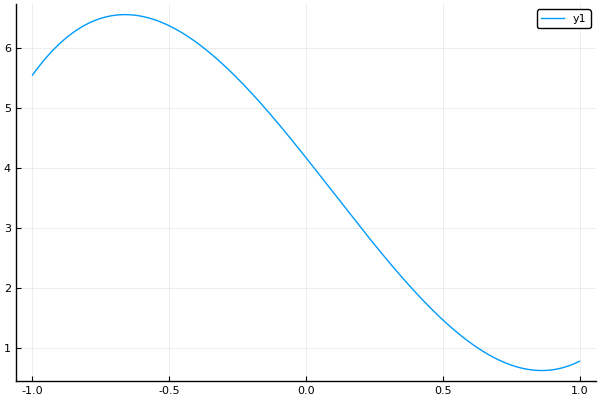

In [43]:
coef, β, γ = calculate_base(3)
ys3 = map(x -> Clenshaw(3, coef, β, γ,x), xs)
plot(xs, ys3)

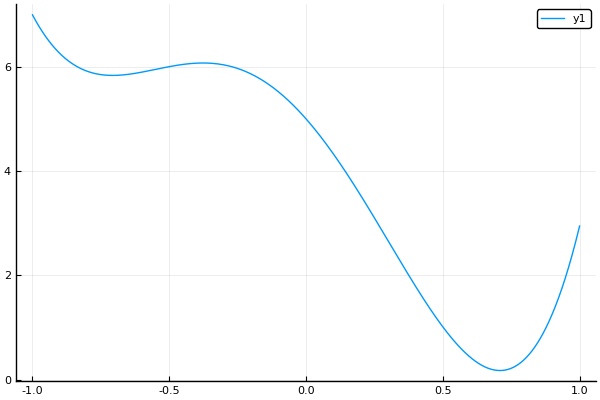

In [44]:
coef, β, γ = calculate_base(4)
ys4 = map(x -> Clenshaw(4, coef, β, γ,x), xs)
plot(xs, ys4)

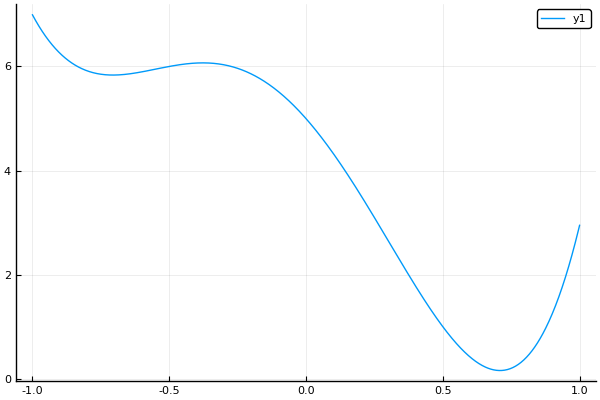

In [45]:
coef, β, γ = calculate_base(5)
ys5 = map(x -> Clenshaw(5, coef, β, γ,x), xs)
plot(xs, ys5)

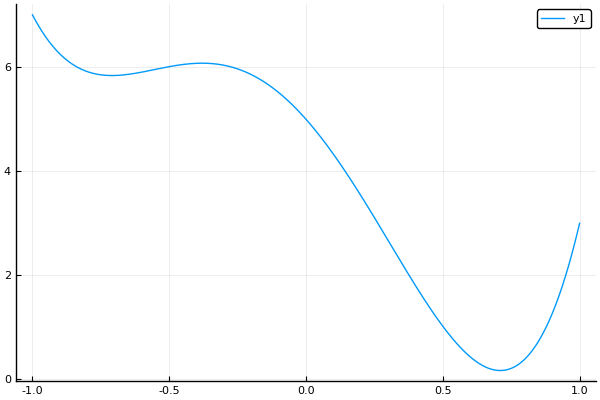

In [46]:
coef, β, γ = calculate_base(6)
ys6 = map(x -> Clenshaw(6, coef, β, γ,x), xs)
plot(xs, ys6)

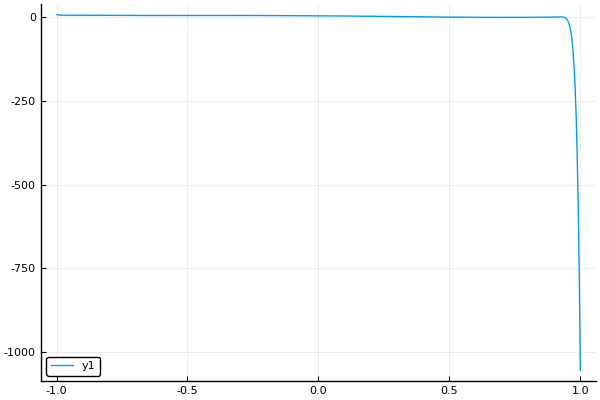

In [47]:
coef, β, γ = calculate_base(30)
ys30 = map(x -> Clenshaw(30, coef, β, γ,x), xs)
plot(xs, ys30)

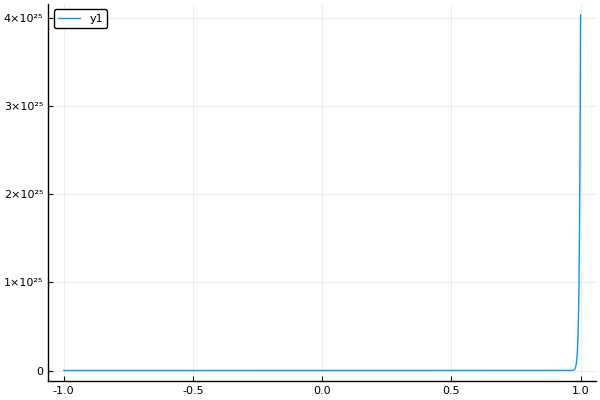

In [48]:
coef, β, γ = calculate_base(99)
ys99 = map(x -> Clenshaw(99, coef, β, γ,x), xs)
plot(xs, ys99)

Funkcja licząca maksymalną odległość między punktami (dla 100 punktów)

In [49]:
function max_error(x,x1)
    error = Float64[]
    for i = 1:100
        push!(error, abs(x[i] - x1[i]))
    end
    return maximum(error)
end

max_error (generic function with 1 method)

Funkcja wyliczająca tablicę maksymalnych odchyleń dla 99 wielomianów optymalnych

In [50]:
function optimal(n,y)
    error = Float64[]
    for i = 1:n
        coef, β, γ = calculate_base(i)
        ys_optimal = map(x -> Clenshaw(i, coef, β, γ,x), random_points)
        push!(error,max_error(y,ys_optimal))
    end
    return error
end

optimal_normal = optimal(99,random_points_values)
optimal_added = optimal(99,random_points_values_added)

for i = 1:99
    @printf("%i & %0.8f & %0.8f \\\\\n", i, optimal_normal[i], optimal_added[i])
end


1 & 1.44252644 & 1.48584093 \\
2 & 1.88380896 & 1.84105703 \\
3 & 1.27338771 & 1.34318956 \\
4 & 0.03277270 & 0.10671792 \\
5 & 0.02963609 & 0.10876524 \\
6 & 0.02417554 & 0.11170818 \\
7 & 0.02987027 & 0.11424070 \\
8 & 0.03653782 & 0.10993882 \\
9 & 0.03957052 & 0.10793370 \\
10 & 0.04337917 & 0.10639098 \\
11 & 0.04354788 & 0.10627199 \\
12 & 0.04280020 & 0.10573347 \\
13 & 0.04311076 & 0.10721117 \\
14 & 0.04141669 & 0.10812071 \\
15 & 0.05859067 & 0.11773645 \\
16 & 0.05485730 & 0.11600907 \\
17 & 0.06141204 & 0.11629595 \\
18 & 0.06563357 & 0.10977982 \\
19 & 0.06558500 & 0.10971199 \\
20 & 0.07288976 & 0.10942879 \\
21 & 0.08145564 & 0.10782119 \\
22 & 0.07818233 & 0.11065130 \\
23 & 0.06756760 & 0.10709026 \\
24 & 0.06716702 & 0.10708814 \\
25 & 0.08830482 & 0.10377911 \\
26 & 0.08540600 & 0.10788640 \\
27 & 0.08285390 & 0.10740468 \\
28 & 0.08292064 & 0.10748753 \\
29 & 0.09605213 & 0.09605255 \\
30 & 0.09482082 & 0.09800957 \\
31 & 0.10378143 & 0.09433469 \\
32 & 0.10208939 &